# Lab 3

We will continue working with the [SUSY](https://archive.ics.uci.edu/ml/datasets/SUSY) and
[Higgs](https://archive.ics.uci.edu/ml/datasets/HIGGS) datasets in this lab and building some functions that would be useful to investigate any data. You will be making a lot of plots, separately for Higgs and SUSY datasets. Therefore use three separate notebooks and a python module:

* Copy of this lab where you work out the problems and make representative plots testing your code.
* A python module where you copy and paste the functions developed in this lab.
* Separate notebook containing plots, tables, and comments for
    * SUSY Dataset
    * Higgs Dataset

Make an effort to put in text boxes and organize your output so it is readable and well formatted. The goal of the SUSY/Higgs dataset is to present your analysis of the data, including your observations and motivation for your choices.

## Correlation

### Exercise 1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to [Data 1401 Visualization Lecture](https://github.com/UTA-DataScience/DATA1401.2020.Fall/blob/master/Lectures/Lecture.36/Lecture.36.ipynb) for details. Do not use `seaborn`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

s_file = "/home/monicatnm/Lab.Resources/susy-small.csv"
h_file = "/home/monicatnm/Lab.Resources/higgs-small.csv"

dfs = pd.read_csv(s_file, dtype='float64', names=VarNames)
dfh = pd.read_csv(h_file, dtype='float64', names=VarNames)

In [4]:
df_sig_s=dfs[dfs.signal==1]
df_bkg_s=dfs[dfs.signal==0]

df_sig_h=dfh[dfh.signal==1]
df_bkg_h=dfh[dfh.signal==0]

In [11]:
def compare_distributions(df,column_name,selections,**kwargs):
    for label,selection in selections.items():        
        _=plt.hist(df[selection][column_name],label=label,stacked=True,**kwargs)
    _=plt.legend()

In [12]:
def compare_scatter(df,x_var_name,y_var_name,selections,make_legend=True) :
    for label,selection in selections.items():   
        _=plt.scatter(df[selection][x_var_name],df[selection][y_var_name],label=label)

    _=plt.xlabel(x_var_name)
    _=plt.ylabel(y_var_name)

    if make_legend:
        _=plt.legend()

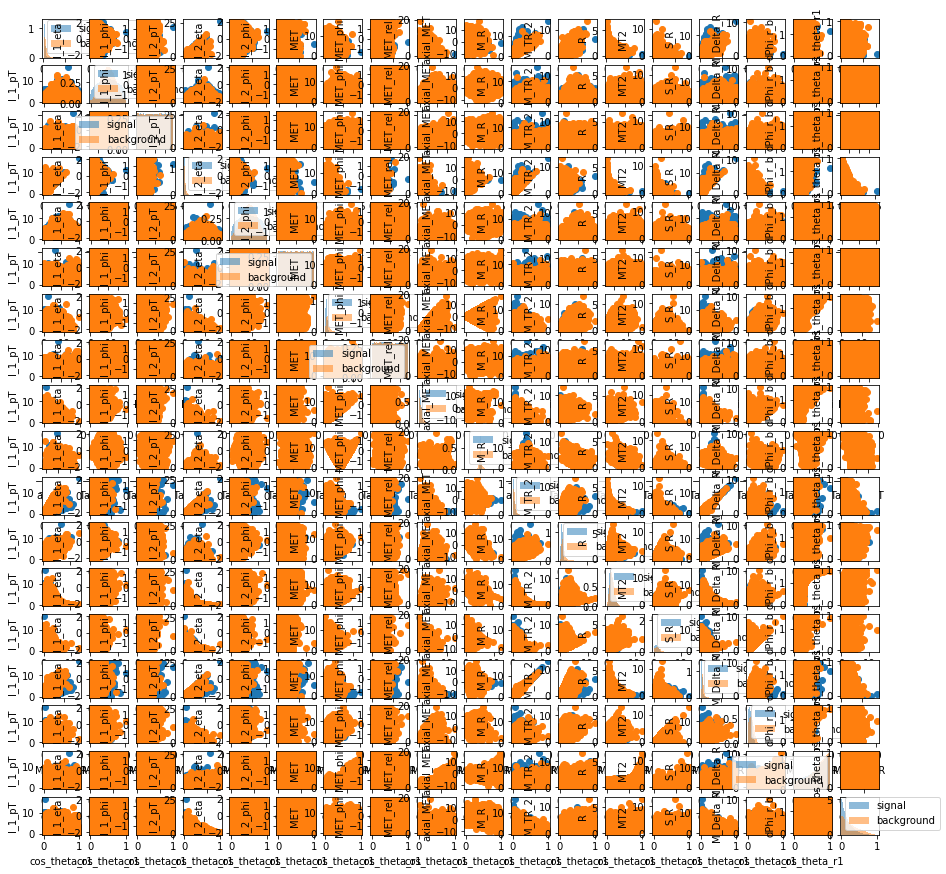

In [13]:
selection_dict={"signal":dfs["signal"]==0.,"background":dfs["signal"]==1}

columns = dfs.columns[1:]
n_columns=len(columns)
plt.figure(figsize=(15,15))

plot_i=0
for i,x_var_name in enumerate(columns):
    for j,y_var_name in enumerate(columns):
        plot_i+=1
        plt.subplot(n_columns,n_columns,plot_i)
        make_legend = plot_i==1
        if i==j:
            compare_distributions(dfs,x_var_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
        else:
            compare_scatter(dfs,x_var_name,y_var_name,selection_dict,make_legend=make_legend)

<ipython-input-55-8c3352f0c1c7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _=plt.hist(df[selection][column_name],label=label,stacked=True,**kwargs)


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

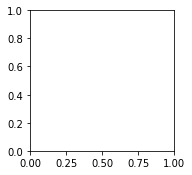

In [80]:
selection_dicth={"signal":dfh["signal"]==0.,"background":dfh["signal"]==1}

columns = dfh.columns[1:6]
n_columns=len(columns)
plt.figure(figsize=(15,15))

plot_i=0
for i,x_var_name in enumerate(columns):
    for j,y_var_name in enumerate(columns):
        plot_i+=1
        plt.subplot(n_columns,n_columns,plot_i)
        make_legend = plot_i==1
        if i==j:
            compare_distributions(dfh,x_var_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
        else:
            compare_scatter(dfh,x_var_name,y_var_name,selection_dicth,make_legend=make_legend)

ValueError: num must be 1 <= num <= 15, not 16

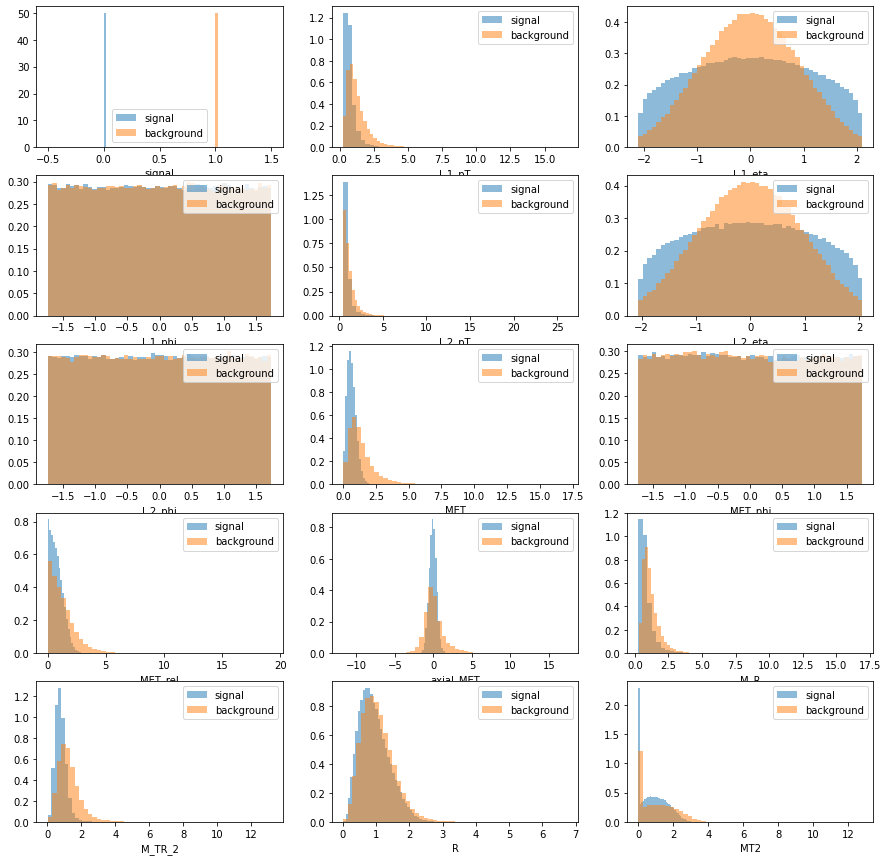

In [61]:
selection_dict={"signal":df["signal"]==0.,"background":df["signal"]!=0}

plt.figure(figsize=(15,15))

for i,column_name in enumerate(df.columns):
    plt.subplot(5,3,i+1)
    compare_distributions(df,column_name,
                     selection_dict,
                     alpha=0.5,
                     density=1,
                     bins=50,
                     )
    plt.xlabel(column_name)
plt.show()

In [41]:
compare_scatter(df_S,Sdf_sig,Hdf_sig,selection_dict)

ValueError: cannot join with no overlapping index names

In [ ]:
for x_var_name in df.columns:
    for y_var_name in df.columns:
        compare_scatter(df,x_var_name,y_var_name,selection_dict)
        plt.show()

In [62]:
columns = df.columns[1:6]
n_columns=len(columns)
plt.figure(figsize=(15,15))

plot_i=0
for i,x_var_name in enumerate(columns):
    for j,y_var_name in enumerate(columns):
        plot_i+=1
        plt.subplot(n_columns,n_columns,plot_i)
        make_legend = plot_i==1
        compare_scatter(df,x_var_name,y_var_name,selection_dict,make_legend=make_legend)

Error in callback <function flush_figures at 0x7f5987752040> (for post_execute):


KeyboardInterrupt: 

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

In [ ]:
selection_dict={"signal":dfs["signal"]==0.,"background":dfs["signal"]==1}

columns = dfs.columns[1:6]
n_columns=len(columns)
plt.figure(figsize=(15,15))

plot_i=0
for i,x_var_name in enumerate(columns):
    plot_i+=1
    plt.subplot(n_columns,n_columns,plot_i)
    make_legend = plot_i==1
    if i:
        compare_distributions(dfs,x_var_name,
                 selection_dict,
                 alpha=0.5,
                 density=1,
                 bins=50,
                 )
    else:
        compare_scatter(dfs,x_var_name,,selection_dict,make_legend=make_legend)

In [ ]:
selection_dicth={"signal":dfs["signal"]==0.,"background":dfs["signal"]==1}

columns = dfh.columns[1:6]
n_columns=len(columns)
plt.figure(figsize=(15,15))

plot_i=0
for i,x_var_name in enumerate(columns):
    plot_i+=1
    plt.subplot(n_columns,n_columns,plot_i)
    make_legend = plot_i==1
    if i:
        compare_distributions(dfh,x_var_name,
                 selection_dict,
                 alpha=0.5,
                 density=1,
                 bins=50,
                 )
    else:
        compare_scatter(dfh,x_var_name,,selection_dict,make_legend=make_legend)

#### Part c
Which observables appear to be best for separating signal from background?

### Exercise 2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

In [16]:
!pip3 install tabulate

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.  


#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.

Hint: Example code for embedding a `tabulate` table into a notebook:

In [9]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Selection

### Exercise 3

#### Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x| > x_c$
4. $|x| < x_c$

where $x_c$ is value to be determined below.

#### Part b
Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

#### Part c
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

## Cut Flow

### Exercise 4

#### Part a
For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

#### Part b
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

#### Part c
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?


